<a href="https://colab.research.google.com/github/386-cluehrs/Google-Colab/blob/main/Staedte_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.2 MB/s eta 0:00:00


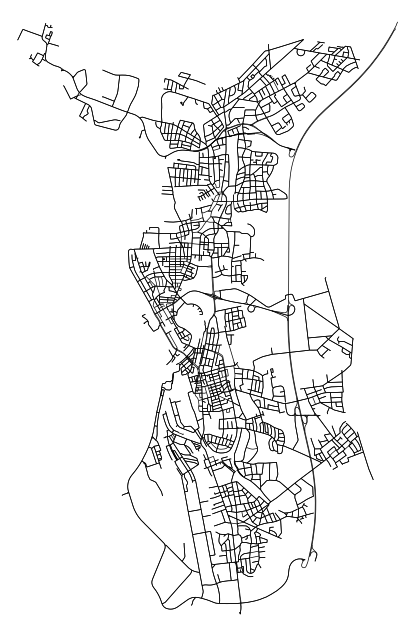

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# 1. Stadt definieren
place_name = "Bremerhaven, Germany"

# 2. Straßennetzwerk laden (drive = befahrbare Straßen)
# 'all' würde auch Fußwege etc. einschließen
graph = ox.graph_from_place(place_name, network_type='drive')

# 3. Plotten: Schwarz auf Weiß
fig, ax = ox.plot_graph(
    graph,
    node_size=0,          # Keine Punkte an Kreuzungen
    edge_color='black',   # Straßenfarbe
    edge_linewidth=0.5,   # Liniendicke
    bgcolor='white',      # Hintergrundfarbe
    show=True,
    close=False
)

# 4. Speichern als hochauflösendes Bild
fig.savefig("stadt_karte.png", dpi=300, bbox_inches='tight')

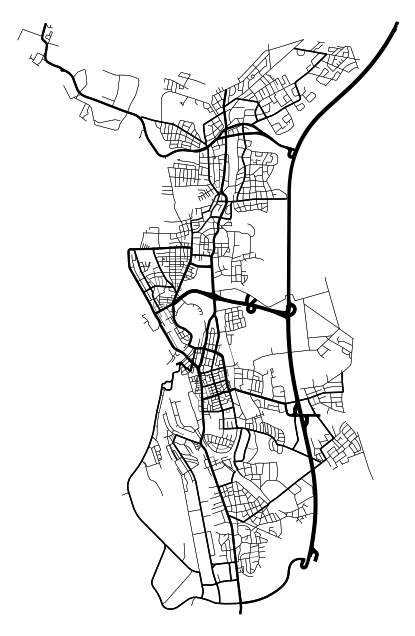

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# 1. Stadt definieren
place_name = "Bremerhaven, Germany"

# 2. Graph laden
graph = ox.graph_from_place(place_name, network_type='drive')

# 3. Funktion zur Bestimmung der Liniendicke
def get_edge_width(highway_type):
    # Hauptstraßen (Motorway, Trunk)
    if 'motorway' in str(highway_type) or 'trunk' in str(highway_type):
        return 2.5
    # Wichtige Stadtstraßen (Primary, Secondary)
    elif 'primary' in str(highway_type) or 'secondary' in str(highway_type):
        return 1.5
    # Kleinere Erschließungsstraßen (Tertiary)
    elif 'tertiary' in str(highway_type):
        return 1.0
    # Alles andere (Wohnstraßen, Gassen)
    else:
        return 0.3

# 4. Liniendicken für alle Kanten im Graph berechnen
widths = [get_edge_width(data['highway']) for u, v, k, data in graph.edges(data=True, keys=True)]

# 5. Plotten mit den individuellen Breiten
fig, ax = ox.plot_graph(
    graph,
    node_size=0,
    edge_color='black',
    edge_linewidth=widths,  # Hier setzen wir unsere berechnete Liste ein
    bgcolor='white',
    show=False,
    close=False
)

# 6. Speichern
fig.savefig("stadt_hierarchie.png", dpi=600, bbox_inches='tight')
plt.show()

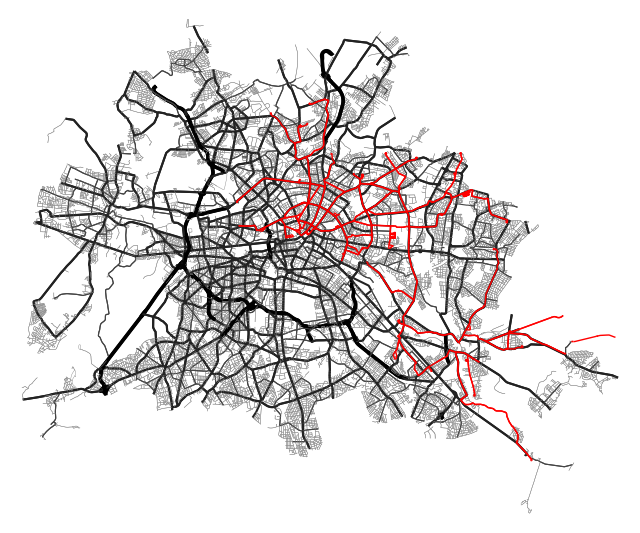

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# 1. Stadt definieren
place_name = "Berlin, Germany"

# 2. Graph laden
graph = ox.graph_from_place(place_name, network_type='drive')

tags = {"railway": "tram"}
trams = ox.features_from_place(place_name, tags)

# 3. Logik für Dicke und Farbe definieren
def get_edge_style(highway_type):
    # Hauptstraßen (Motorway, Trunk) - Tiefschwarz und dick
    if 'motorway' in str(highway_type) or 'trunk' in str(highway_type):
        return 2.5, '#000000'
    # Wichtige Stadtstraßen (Primary, Secondary) - Schwarz und mittel
    elif 'primary' in str(highway_type) or 'secondary' in str(highway_type):
        return 1.5, '#222222'
    # Kleinere Erschließungsstraßen (Tertiary) - Dunkelgrau und dünner
    elif 'tertiary' in str(highway_type):
        return 0.8, '#444444'
    # Alles andere (Wohnstraßen, Gassen) - Hellgrau und hauchdünn
    else:
        return 0.3, '#888888'

# 4. Listen für Dicke und Farbe erstellen
widths = []
colors = []

for u, v, k, data in graph.edges(data=True, keys=True):
    w, c = get_edge_style(data['highway'])
    widths.append(w)
    colors.append(c)

# 5. Plotten mit beiden Listen
fig, ax = ox.plot_graph(
    graph,
    node_size=0,
    edge_color=colors,     # Liste mit Farbwerten
    edge_linewidth=widths, # Liste mit Stärken
    bgcolor='white',
    show=False,
    close=False
)

# 5. Straßenbahnen hinzufügen
# Wir prüfen, ob überhaupt Tram-Daten gefunden wurden
if not trams.empty:
    # Wir filtern nur Linienobjekte (LineString/MultiLineString)
    trams.plot(ax=ax, color='red', linewidth=1, alpha=1.0, zorder=3)

# 6. Export als hochauflösendes Bild oder PDF
# PDF ist ideal, wenn du das Bild später ohne Qualitätsverlust drucken willst.
fig.savefig("/content/drive/MyDrive/Staedte/stadt8.png", dpi=600, bbox_inches='tight')
#fig.savefig("stadt_design.pdf", bbox_inches='tight')

#from google.colab import files
#files.download("stadt1.png")

plt.show()

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# 1. Einstellungen & Cache
ox.settings.use_cache = True
place_name = "Woltersdorf, Germany"

# 2. Daten laden
# 'all' zieht alle Wege (auch kleinste Gassen)
graph_roads = ox.graph_from_place(place_name, network_type='all')

# KORREKTUR: Features statt Geometries
tags = {"railway": "tram"}
trams = ox.features_from_place(place_name, tags)

# 3. Style-Logik für die Straßen
def get_style(highway_type):
    # Wir wandeln alles in String um, falls es Listen sind
    h_type = str(highway_type)
    if 'motorway' in h_type or 'trunk' in h_type:
        return 2.0, '#000000' # Dick & Schwarz
    elif 'primary' in h_type or 'secondary' in h_type:
        return 1.2, '#333333' # Mittel & Dunkelgrau
    else:
        return 0.2, '#999999' # Hauchdünn & Hellgrau (für alle winzigen Straßen)

widths = []
colors = []
for u, v, k, data in graph_roads.edges(data=True, keys=True):
    w, c = get_style(data.get('highway', ''))
    widths.append(w)
    colors.append(c)

# 4. Plotten
fig, ax = ox.plot_graph(
    graph_roads,
    node_size=0,
    edge_color=colors,
    edge_linewidth=widths,
    bgcolor='white',
    show=False,
    close=False
)

# 5. Straßenbahnen hinzufügen
# Wir prüfen, ob überhaupt Tram-Daten gefunden wurden
if not trams.empty:
    # Wir filtern nur Linienobjekte (LineString/MultiLineString)
    trams.plot(ax=ax, color='black', linewidth=1.5, alpha=1.0, zorder=3)

# 6. Export
# Hohe DPI für scharfe kleinste Straßen
fig.savefig("/drive/MyDrive/Staedte/stadt_detail_trams.png", dpi=800, bbox_inches='tight')
plt.show()

InsufficientResponseError: No matching features. Check query location, tags, and log.

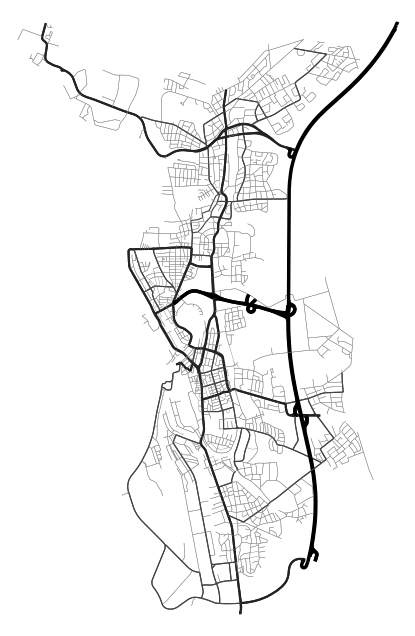

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# 1. Stadt definieren
place_name = "Bremerhaven, Germany"

# 2. Graph laden
graph = ox.graph_from_place(place_name, network_type='drive')

# 3. Logik für Dicke und Farbe definieren
def get_edge_style(highway_type):
    # Hauptstraßen (Motorway, Trunk) - Tiefschwarz und dick
    if 'motorway' in str(highway_type) or 'trunk' in str(highway_type):
        return 2.5, '#000000'
    # Wichtige Stadtstraßen (Primary, Secondary) - Schwarz und mittel
    elif 'primary' in str(highway_type) or 'secondary' in str(highway_type):
        return 1.5, '#222222'
    # Kleinere Erschließungsstraßen (Tertiary) - Dunkelgrau und dünner
    elif 'tertiary' in str(highway_type):
        return 0.8, '#444444'
    # Alles andere (Wohnstraßen, Gassen) - Hellgrau und hauchdünn
    else:
        return 0.3, '#888888'

# 4. Listen für Dicke und Farbe erstellen
widths = []
colors = []

for u, v, k, data in graph.edges(data=True, keys=True):
    w, c = get_edge_style(data['highway'])
    widths.append(w)
    colors.append(c)

# 5. Plotten mit beiden Listen
fig, ax = ox.plot_graph(
    graph,
    node_size=0,
    edge_color=colors,     # Liste mit Farbwerten
    edge_linewidth=widths, # Liste mit Stärken
    bgcolor='white',
    show=False,
    close=False
)

# 6. Export als hochauflösendes Bild oder PDF
# PDF ist ideal, wenn du das Bild später ohne Qualitätsverlust drucken willst.
fig.savefig("stadt_design.png", dpi=2400, bbox_inches='tight')
fig.savefig("stadt_design.pdf", bbox_inches='tight')

plt.show()